In [1]:
from twopoint_configuration import *

Using CAMB 1.1.3 installed at /global/homes/n/nishant/.conda/envs/cobaya/lib/python3.8/site-packages/camb


In [2]:
Fiducial = Universe()
Fiducial.runCAMB()
DESY1 = Kernels(Fiducial)
filename = 'map_prediction_chain_2x2pt_fixedcosmo_free_mag_pm_samp_buzzard_mean_dv_16_sompz_bin_zs_true_true_zl_no_sn_no_jk_20xrand_bNGcov.fits_scales_3x2pt_0.5_8_6_v0.4.ini_lcdm_scaledrsd.txt'
DESY1.loadDES_nzs(filename)

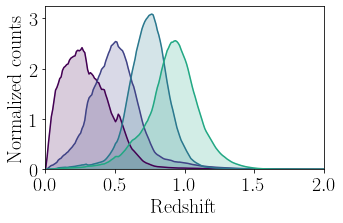

<Figure size 432x288 with 0 Axes>

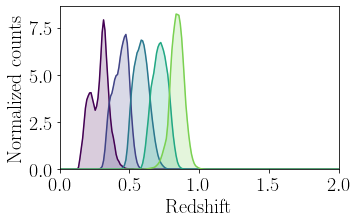

<Figure size 432x288 with 0 Axes>

In [3]:
DESY1.plot_source_nzs()
DESY1.plot_lens_nzs()

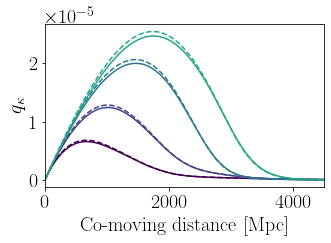

<Figure size 432x288 with 0 Axes>

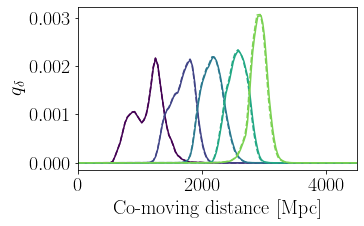

<Figure size 432x288 with 0 Axes>

In [4]:
DESY1.source_kernel()
DESY1.lens_kernel()

DESY1.plot_source_kernels()
DESY1.plot_lens_kernels()

In [5]:
#b1, b2, bs2, bnabla2, SN
Fiducial.set_biasParams_Anzu(0.7, 0, 0, 0 ,0)

wave_density = 1000
k_range = np.logspace(-10,-0.177, wave_density)

z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)
Fiducial.extrapolatePowerSpectrum(1000)

starting loop


In [6]:
Fiducial.k_range

array([1.00000000e-10, 1.02289919e-10, 1.04632274e-10, ...,
       8.62222871e+02, 9.28559568e+02, 1.00000000e+03])

(1099, 401)


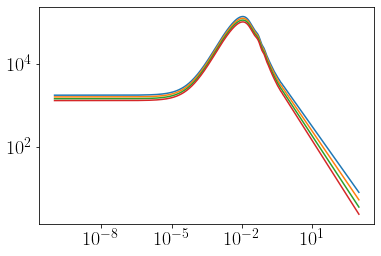

In [7]:
print(Fiducial.Pmm.shape)

plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 0])
plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 10])
plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 20])
plt.plot(Fiducial.k_range, Fiducial.Pmg[:, 30])

plt.xscale('log')
plt.yscale('log')


In [8]:
TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)
start = time.time()

C_kk = TwoPointHarmonicDESY1.genC_kk()
C_dk = TwoPointHarmonicDESY1.genC_dk()
C_dd = TwoPointHarmonicDESY1.genC_dd()

end = time.time()

print(end-start)
print(C_kk.shape)
print(C_dk.shape)
print(C_dd.shape)

5.458704471588135
(4, 4, 3000)
(5, 4, 3000)
(5, 5, 3000)


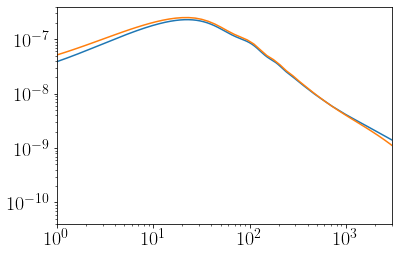

In [10]:
ell_test = np.loadtxt('ell.txt')
bin_3_3_test = np.loadtxt('bin_3_3.txt')
R = .0000

plt.plot(TwoPointHarmonicDESY1.ells, C_dk[2,2,:])# * np.exp(-TwoPointHarmonicDESY1.ells**2 * R**2))
plt.plot(ell_test, bin_3_3_test)
plt.ylim(4e-11, 4e-7)
plt.xlim(1,3000)
plt.xscale('log')
plt.yscale('log')

In [11]:
(200*np.pi/(60*180))

0.05817764173314432

In [12]:
TwoPointConfigurationDESY1 = TwoPointConfiguration(TwoPointHarmonicDESY1, (200*np.pi/(60*180)), 10000)

In [13]:
TwoPointHarmonicDESY1.lmax

10000

In [14]:
LegendreMatrix = TwoPointConfigurationDESY1.genLegendre()


In [15]:
print(LegendreMatrix.shape)
print(TwoPointHarmonicDESY1.C_dd[1,1,:].shape)


(10000, 10000)
(3000,)


In [16]:
w = TwoPointConfigurationDESY1.gen_w(R=0.000000, shot_noise=0)

print(np.arange(TwoPointConfigurationDESY1.TwoPointHarmonic.lmax))

[   0    1    2 ... 9997 9998 9999]


In [17]:
w.shape

(4, 10000)

xip
xim
gammat
wtheta


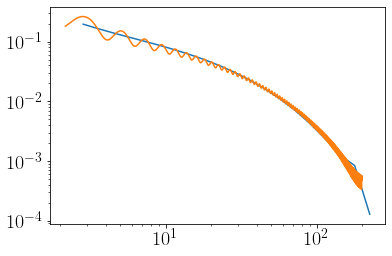

In [18]:
plt.xscale('log')
plt.yscale('log')

filename1 = 'map_prediction_chain_2x2pt_fixedcosmo_free_mag_pm_samp_buzzard_mean_dv_16_sompz_bin_zs_true_true_zl_no_sn_no_jk_20xrand_bNGcov.fits_scales_3x2pt_0.5_8_6_v0.4.ini_lcdm_scaledrsd.txt'


test = fits.open(filename1 +'.fits')

T1 = twopoint.TwoPointFile.from_fits(filename1 + '.fits')
print(T1)

for spectra in T1.spectra:
    print(spectra.name)
    if spectra.name == 'wtheta':
        i,j = spectra.bin_pairs[3]
        theta, wtheta = spectra.get_pair(i,j)
        plt.plot(theta, wtheta, label='joe')
        plt.plot(TwoPointConfigurationDESY1.theta_range*60*180/np.pi, w[2,:])
        #plt.xlim(2,200)

In [74]:
a = np.array([[1, 0],
              [60, 1],
              [0, 1],
              [10, 1],
              [0, 10]])
print(a.shape)

b = np.array([1, 2])

print(b.shape)

np.matmul(a, b)

(5, 2)
(2,)


array([ 1, 62,  2, 12, 20])

In [ ]:
#b1, b2, bs2, bnabla2, SN
C_dk_list = []
C_kk_list = []

for num in np.linspace(0.2, 1.5, 3):
    start = time.time()

    Fiducial.set_biasParams_Anzu(num, 0, 0, 0 ,0)

    wave_density = 1000
    k_range = np.logspace(-5,-0.177, wave_density)

    z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)


    TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)

    C_dk_list.append(TwoPointHarmonicDESY1.genC_dk())
    C_kk_list.append(TwoPointHarmonicDESY1.genC_kk())
    #C_dd = TwoPointHarmonicDESY1.genC_dd()

    end = time.time()

    print(end-start, ' seconds')

In [ ]:
import matplotlib.cm as cm

In [ ]:
colormap = cm.get_cmap('Reds', 3)

for num in range(3):
    C_dk_temp = C_dk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_dk_temp[2,2,:], color=colormap(num), label='$b_1 = $' + str(np.round(np.linspace(0.2, 2, 3)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\delta \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('C_dk_b1_bias.pdf', bbox_inches='tight')
plt.show()

In [ ]:
colormap = cm.get_cmap('Reds', 3)

for num in range(3):
    C_kk_temp = C_kk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_kk_temp[2,2,:], color=colormap(num), label='$b_1 = $' + str(np.round(np.linspace(0.2, 2, 3)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\kappa \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('C_kk_b1_bias.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#b1, b2, bs2, bnabla2, SN
C_dk_list = []
for num in np.linspace(-2, 2, 5):
    start = time.time()

    Fiducial.set_biasParams_Anzu(0.7, num, 0, 0 ,0)

    wave_density = 1000
    k_range = np.logspace(-5,-0.177, wave_density)

    z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)


    TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)

    C_dk_list.append(TwoPointHarmonicDESY1.genC_dk())
    #C_dk = TwoPointHarmonicDESY1.genC_dk()
    #C_dd = TwoPointHarmonicDESY1.genC_dd()

    end = time.time()

    print(end-start, ' seconds')

In [ ]:
colormap = cm.get_cmap('Reds', 5)

for num in range(5):
    C_dk_temp = C_dk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_dk_temp[2,2,:], color=colormap(num), label='$b_2 = $' + str(np.round(np.linspace(-2, 2, 5)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\delta \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('C_dk_b2_bias.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#b1, b2, bs2, bnabla2, SN
C_dk_list = []
for num in np.linspace(-4, 4, 5):
    start = time.time()

    Fiducial.set_biasParams_Anzu(0.7, 0, num, 0 ,0)

    wave_density = 1000
    k_range = np.logspace(-5,-0.177, wave_density)

    z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)


    TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)

    C_dk_list.append(TwoPointHarmonicDESY1.genC_dk())
    #C_dk = TwoPointHarmonicDESY1.genC_dk()
    #C_dd = TwoPointHarmonicDESY1.genC_dd()

    end = time.time()

    print(end-start, ' seconds')

In [ ]:
colormap = cm.get_cmap('Reds', 5)

for num in range(5):
    C_dk_temp = C_dk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_dk_temp[2,2,:], color=colormap(num), label=r'$b_{\nabla^2} = $' + str(np.round(np.linspace(-4, 4, 5)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\delta \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()